# Task 4.10 - Book 3.  Singles profile

## The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

##  The cop_sample_active dataframe created in Book 2 will be used to profile customers likes and interests.

# This script contains the following points:

## 1. Import small active dataframe

## 2. Create a flag excluding all family_status but single

## 3. Analyze types of products most purchased by this group

   ### Department id bar graph
   
   ### Expenditures by age

   ### Income by age

   ### Expenditures by time of day
   
   ### Orders by time of day
    
   ### Orders by day of the week

   ### Loyalty bar graph

   ### Expenditures by region
   
   ### Price range bar graph

## 4. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## 5. Export sample containing single customers

In [1]:
# Import panda, numpy, os libraries

import pandas as pd
import numpy as np
import os

## 1. Import small dataframe

In [2]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 4\Instacart Basket Analysis'

In [3]:
# Import small_cop_sample dataframe

df_cust = pd.read_pickle(os.path.join(path,'02_Data','Prepared_Data', 'cop_sample_active.pkl'))

In [6]:
# top 5 rows

df_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active
19,10473,Half And Half Cream,53,16,7.0,2823056,138,8,6,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active


In [7]:
# bottom 5 rows

df_cust.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag
32404779,49683,Cucumber Kirby,83,4,13.2,2070022,169498,5,3,16,...,Female,New Jersey,47,9/23/2017,3,married,150640,both,northeast_region,active
32404792,47388,Organic Plain Kefir,120,16,14.5,2246875,28213,9,0,12,...,Male,Florida,41,11/16/2019,2,married,146721,both,south_region,active
32404801,47823,Organic Vanilla Kefir,120,16,13.5,2246875,28213,9,0,12,...,Male,Florida,41,11/16/2019,2,married,146721,both,south_region,active
32404835,49070,TEN TEN,77,7,2.3,2818658,31628,5,3,13,...,Male,Delaware,32,7/2/2017,2,married,42899,both,south_region,active
32404843,49235,Organic Half & Half,53,16,1.8,3310701,27382,5,3,9,...,Female,Vermont,68,11/25/2019,3,married,37867,both,northeast_region,active


In [8]:
# Data types

df_cust.dtypes

product_id                    int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
order_id                      int64
user_id                      object
order_number                  int64
orders_day_of_week            int64
order_time_of_day             int64
days_since_prior_order      float64
first_time_order               bool
add_to_cart_order             int64
reordered                     int64
price_range_loc              object
busiest_day                  object
busiest_days                 object
busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
mean_prices                 float64
spending_flag                object
median_days_prior_order     float64
frequency_flag               object
first_name                   object
surname                      object
gender                       object
state                       

In [9]:
# size of dataframe

df_cust.shape

(7323504, 36)

In [10]:
df_cust.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices,median_days_prior_order,age,num_of_dependants,income
count,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06
mean,2.559134e+04,7.117049e+01,9.926925e+00,1.171897e+01,1.710041e+06,2.194956e+01,2.747439e+00,1.336154e+01,1.008628e+01,8.375121e+00,6.931676e-01,3.848845e+01,1.173141e+01,8.951742e+00,4.945896e+01,1.501986e+00,9.990764e+04
std,1.407492e+04,3.823449e+01,6.282344e+00,4.764153e+02,9.874093e+05,1.772100e+01,2.084054e+00,4.245814e+00,8.140838e+00,7.162259e+00,4.611792e-01,2.502359e+01,7.442565e+01,5.791631e+00,1.848684e+01,1.119082e+00,4.337842e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.558568e+05,9.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.800000e+01,7.398759e+00,5.000000e+00,3.300000e+01,0.000000e+00,6.751100e+04
50%,2.525200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710000e+06,1.600000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,3.300000e+01,7.824403e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.685300e+04
75%,3.793800e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565187e+06,2.900000e+01,5.000000e+00,1.600000e+01,1.300000e+01,1.100000e+01,1.000000e+00,5.200000e+01,8.240554e+00,1.100000e+01,6.500000e+01,3.000000e+00,1.281690e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.360000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [4]:
# Customer expenditure 
df_cust['spent'] = df_cust['prices'] * df_cust['order_number']

In [5]:
df_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag,spent
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,162.4
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,200.0
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,101.2
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,64.0
19,10473,Half And Half Cream,53,16,7.0,2823056,138,8,6,14,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,56.0


## 2. Create a flag excluding all family_status but single

In [6]:
status = ['single']

df_cust3 = df_cust.loc[df_cust['family_status'].isin(status)]

In [7]:
# remove limit on number rows to display

pd.options.display.max_rows = None

In [8]:
# top 100 rows of singles dataframe

df_cust3.head(100)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag,spent
2090,1,Chocolate Sandwich Cookies,61,19,5.8,2269226,4006,5,3,13,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,29.0
2091,1,Chocolate Sandwich Cookies,61,19,5.8,367316,4006,9,2,11,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,52.2
2092,1,Chocolate Sandwich Cookies,61,19,5.8,1448367,4006,12,1,11,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,69.6
2105,1940,Organic 2% Reduced Fat Milk,84,16,9.1,1213455,4006,25,1,11,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,227.5
2110,1940,Organic 2% Reduced Fat Milk,84,16,9.1,2158416,4006,38,1,9,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,345.8
2118,3696,Original Baked Snack Crackers,78,19,4.2,1448367,4006,12,1,11,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,50.4
2119,3696,Original Baked Snack Crackers,78,19,4.2,1462015,4006,14,1,9,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,58.8
2120,3696,Original Baked Snack Crackers,78,19,4.2,1706008,4006,18,3,13,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,75.6
2131,4920,Seedless Red Grapes,123,4,1.1,367316,4006,9,2,11,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,9.9
2132,4920,Seedless Red Grapes,123,4,1.1,1775706,4006,23,1,8,...,North Carolina,28,5/26/2017,0,single,96906,both,south_region,active,25.3


In [9]:
# size of singles dataframe

df_cust3.shape

(1204273, 37)

## 3. Analyze types of products most purchased by this group

In [11]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Department id bar graph

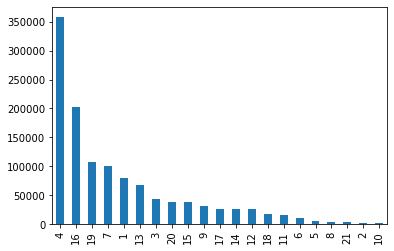

In [25]:
#bar graph on department id

single_bar = df_cust3['department_id'].value_counts().plot.bar()

### When 'family_status' is filtered on 'single', the most frequent 'department_id' counts over 50k are 4, 16, 19, 7, 1, and 13.  These ids correspond to produce, dairy/eggs, snacks, beverages (non-alcoholic), frozen, and pantry, respectively. The least frequent are 5, 8, 21, 2, 10, which correspond to alcohol, pets, missing, other, and bulk.

### This demographic has no dependants.

In [26]:
# Export bar graph as png file

single_bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'single_bar.png'))

## Expenditures by age

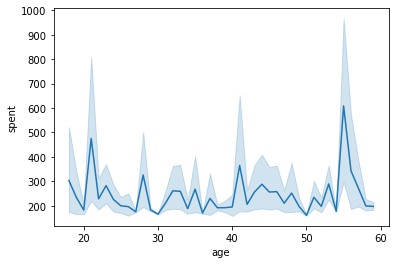

In [13]:
# line chart based on age and expenditures

age_line = sns.lineplot(data = df_cust3, x = 'age', y = 'spent')

### Highest expenditures for this demographic were people in their late fifties (age 55), followed by people in their early twenties (age 21), and early forties (age 41).

In [14]:
# export line graph as a png file

age_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'single_age_line.png'))

### Income by age

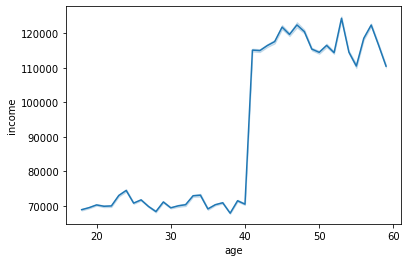

In [15]:
# line graph of income by age

income_line = sns.lineplot(data = df_cust3, x = 'age', y = 'income')

### Baseline income for this group is 70k, and jumped to over 110K after age forty.

In [16]:
# export line graph as a png file

income_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'single_income_line.png'))

## Expenditures by time of day

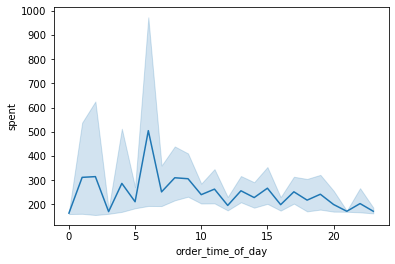

In [13]:
# line graph of expenditures by time of day

single_line = sns.lineplot(data = df_cust3, x = 'order_time_of_day', y = 'spent')

### Spending for this group picks up sharply around 6 (24 hour clock) and steadily drops off until midnight, dropping off after midnight and picking up again between 1-2.

In [14]:
# export line graph as a png file

single_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'single_line.png'))

### Orders by time of day

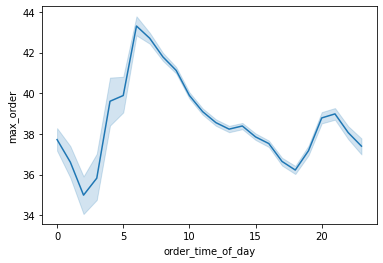

In [12]:
# line graph of max orders by time of day

single2_line = sns.lineplot(data = df_cust3, x = 'order_time_of_day', y = 'max_order')

### Max orders for this group begins to climb between 4-8, and has its highest peak around 6, and declines steadily afterward, with a smaller climb from 19-24, with a smaller peak around 21. 

In [35]:
# export line graph as a png file

single2_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'single2_line.png'))

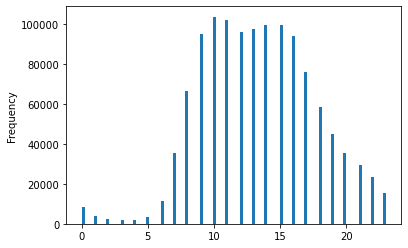

In [36]:
# histogram of frequency of orders by time of day

tod_single_hist = df_cust3['order_time_of_day'].plot.hist(bins = 100)

### Orders time of day peaks around 10, which mirrors the larger Instacart group.

In [37]:
#export histogram as a png file

tod_single_hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'tod_single_hist.png'))

### Orders by day of the week

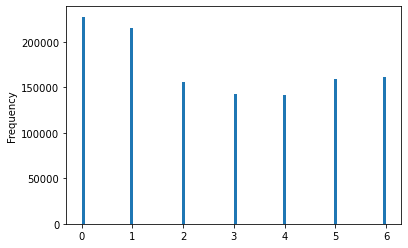

In [45]:
# histogram of frequency of orders by day of week

dow_single_hist = df_cust3['orders_day_of_week'].plot.hist(bins = 100)

### The most orders for this demographic occur on Saturday (0) and Sunday (1).

In [47]:
#export histogram as a png file

dow_single_hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'dow_single_hist.png'))

### Loyalty bar graph

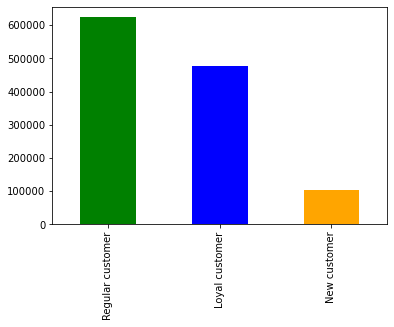

In [17]:
# loyal flag bar graph for the single sample

loyal_bar2 = df_cust3['loyalty_flag'].value_counts().plot.bar(color =['green', 'blue', 'orange'])

In [18]:
# export bar graph to png file

loyal_bar2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'loyal_bar_single.png'))

### Expenditures by region

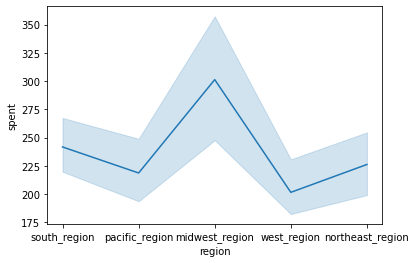

In [19]:
# line graph of expenditures by region

spend_line2 = sns.lineplot(data = df_cust3, x = 'region', y = 'spent')

### Expenditures for this demographic were the largest in the midwest region. The west region had the least expenditures.

In [21]:
# export line graph as a png file

spend_line2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'region_single_line.png'))

### Price range bar graph

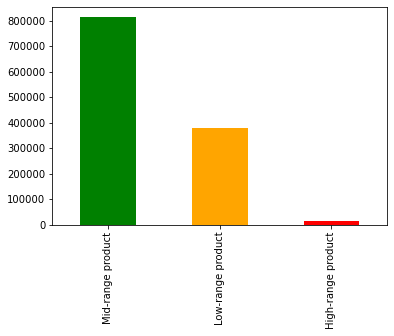

In [30]:
# create price range bar chart

price_rng_bar = df_cust3['price_range_loc'].value_counts().plot.bar(color =['green', 'orange', 'red'])

In [32]:
df_cust3['price_range_loc'].value_counts(dropna = False)

Mid-range product     812297
Low-range product     377208
High-range product     14768
Name: price_range_loc, dtype: int64

### Products in the mid-range were the most frequent purchases.

In [31]:
# export bar graph to png file

price_rng_bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'price_rng_single.png'))

## 4. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [19]:
### aggregate based on order number by singles

df_cust3.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
1                20.302085   5  99
2                22.408297   5  98
3                22.062933   5  99
4                22.677593   5  99
5                22.842948   5  99
6                21.960295   5  99
7                22.097330   5  99
8                18.876876   5  99
9                21.099825   5  99
10               24.264487   5  98
11               21.133177   5  99
12               20.661978   5  99
13               21.786266   5  99
14               21.617769   5  99
15               21.508337   5  99
16               22.666170   5  99
17               20.609479   5  99
18               24.057571   5  99
19               21.886677   5  99
20               21.381147   5  99
21               27.626030   5  99

In [18]:
### aggregate based on expenditures by singles

df_cust3.groupby('department_id').agg({'spent': ['mean', 'min', 'max']})

spent                 
                     mean   min        max
department_id                             
1              155.337468   5.0     1475.1
2              148.891921   6.5     1244.5
3              172.498942   5.5     1445.3
4              180.219499   5.0     1485.0
5              180.104696   5.0     1470.0
6              169.777072   5.5     1344.0
7              170.753472   5.0     1445.4
8              152.206170   5.5     1377.4
9              155.216312   5.0     1475.1
10             197.611293  16.2     1096.5
11             170.510230   5.0     1445.3
12             334.054147  40.0     2465.1
13             174.277439   5.0     1445.3
14             175.811593   5.0     1465.2
15             162.328094   5.5     1455.3
16             621.728443   5.0  3599964.0
17             150.990652   5.0     1386.0
18             180.691349   5.5     1485.0
19              93.415668   8.0      683.1
20             167.363577   5.5     1485.0
21             232.858997   8.4     1352.4

## 5. Export sample containing single customers

In [62]:
# Export as a pickle file

df_cust3.to_pickle(os.path.join(path, '02_Data','Prepared_Data', 'cop_sample_single.pkl'))

In [63]:
# Export as a CSV file

df_cust3.to_csv(os.path.join(path, '02_Data','Prepared_Data', 'CSV_files','cop_sample_single.csv'))